In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from glob import glob
from PIL import Image
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from keras import layers
from functools import partial

AUTO = tf.data.experimental.AUTOTUNE
import warnings
warnings.filterwarnings('ignore')


In [2]:
import os

base_directory = os.getcwd()
print(f"Base directory: {base_directory}")

Base directory: d:\venus\mlmodel


In [4]:
import glob

# Define the paths to the folders containing images
benign_folder = r'D:\venus\mlmodel\train_cancer\benign'
malignant_folder = r'D:\venus\mlmodel\train_cancer\malignant'

# Use glob to find all JPG files in each folder
try:
    benign_images = glob.glob(f'{benign_folder}/*.jpg')
    malignant_images = glob.glob(f'{malignant_folder}/*.jpg')

    # Combine the lists of images
    images = benign_images + malignant_images

    # Print the total number of images and their paths
    print(f"Total number of images: {len(all_images)}")
    for img_path in all_images:
        print(f"Image found: {img_path}")
except Exception as e:
    print(f"Error: {e}")


Total number of images: 270
Image found: D:\venus\mlmodel\train_cancer\benign\12.jpg
Image found: D:\venus\mlmodel\train_cancer\benign\13.jpg
Image found: D:\venus\mlmodel\train_cancer\benign\14.jpg
Image found: D:\venus\mlmodel\train_cancer\benign\17.jpg
Image found: D:\venus\mlmodel\train_cancer\benign\19.jpg
Image found: D:\venus\mlmodel\train_cancer\benign\20.jpg
Image found: D:\venus\mlmodel\train_cancer\benign\21.jpg
Image found: D:\venus\mlmodel\train_cancer\benign\22.jpg
Image found: D:\venus\mlmodel\train_cancer\benign\23.jpg
Image found: D:\venus\mlmodel\train_cancer\benign\24.jpg
Image found: D:\venus\mlmodel\train_cancer\benign\25.jpg
Image found: D:\venus\mlmodel\train_cancer\benign\26.jpg
Image found: D:\venus\mlmodel\train_cancer\benign\27.jpg
Image found: D:\venus\mlmodel\train_cancer\benign\28.jpg
Image found: D:\venus\mlmodel\train_cancer\benign\29.jpg
Image found: D:\venus\mlmodel\train_cancer\benign\3.jpg
Image found: D:\venus\mlmodel\train_cancer\benign\30.jpg
Imag

In [ ]:
import os

# Create the folders if they don't exist
os.makedirs(benign_folder, exist_ok=True)
os.makedirs(malignant_folder, exist_ok=True)


In [26]:
try:
    benign_images = glob.glob(f'{benign_folder}/*.jpg')
    malignant_images = glob.glob(f'{malignant_folder}/*.jpg')

    print(f"Benign images: {benign_images}")
    print(f"Malignant images: {malignant_images}")

    images = benign_images + malignant_images
    print(f"Total number of images: {len(all_images)}")
except Exception as e:
    print(f"Error: {e}")


Benign images: ['D:\\venus\\mlmodel\\train_cancer\\benign\\12.jpg', 'D:\\venus\\mlmodel\\train_cancer\\benign\\13.jpg', 'D:\\venus\\mlmodel\\train_cancer\\benign\\14.jpg', 'D:\\venus\\mlmodel\\train_cancer\\benign\\17.jpg', 'D:\\venus\\mlmodel\\train_cancer\\benign\\19.jpg', 'D:\\venus\\mlmodel\\train_cancer\\benign\\20.jpg', 'D:\\venus\\mlmodel\\train_cancer\\benign\\21.jpg', 'D:\\venus\\mlmodel\\train_cancer\\benign\\22.jpg', 'D:\\venus\\mlmodel\\train_cancer\\benign\\23.jpg', 'D:\\venus\\mlmodel\\train_cancer\\benign\\24.jpg', 'D:\\venus\\mlmodel\\train_cancer\\benign\\25.jpg', 'D:\\venus\\mlmodel\\train_cancer\\benign\\26.jpg', 'D:\\venus\\mlmodel\\train_cancer\\benign\\27.jpg', 'D:\\venus\\mlmodel\\train_cancer\\benign\\28.jpg', 'D:\\venus\\mlmodel\\train_cancer\\benign\\29.jpg', 'D:\\venus\\mlmodel\\train_cancer\\benign\\3.jpg', 'D:\\venus\\mlmodel\\train_cancer\\benign\\30.jpg', 'D:\\venus\\mlmodel\\train_cancer\\benign\\32.jpg', 'D:\\venus\\mlmodel\\train_cancer\\benign\\33.jpg

In [27]:
images = glob.glob('train_cancer/*/*.jpg')
len(images)


270

In [28]:
#replace backslash with forward slash to avoid unexpected errors
images = [path.replace('\\', '/') for path in images]
df = pd.DataFrame({'filepath': images})
df['label'] = df['filepath'].str.split('/', expand=True)[1]
df.head()


,filepath,label
0,train_cancer/benign/12.jpg,benign
1,train_cancer/benign/13.jpg,benign
2,train_cancer/benign/14.jpg,benign
3,train_cancer/benign/17.jpg,benign
4,train_cancer/benign/19.jpg,benign


In [29]:
df['label_bin'] = np.where(df['label'].values == 'malignant', 1, 0)
df.head()


,filepath,label,label_bin
0,train_cancer/benign/12.jpg,benign,0
1,train_cancer/benign/13.jpg,benign,0
2,train_cancer/benign/14.jpg,benign,0
3,train_cancer/benign/17.jpg,benign,0
4,train_cancer/benign/19.jpg,benign,0


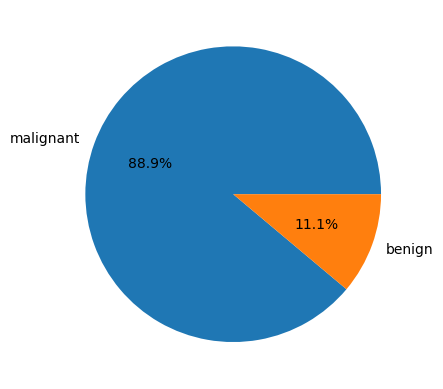

In [30]:
x = df['label'].value_counts()
plt.pie(x.values,
		labels=x.index,
		autopct='%1.1f%%')
plt.show()


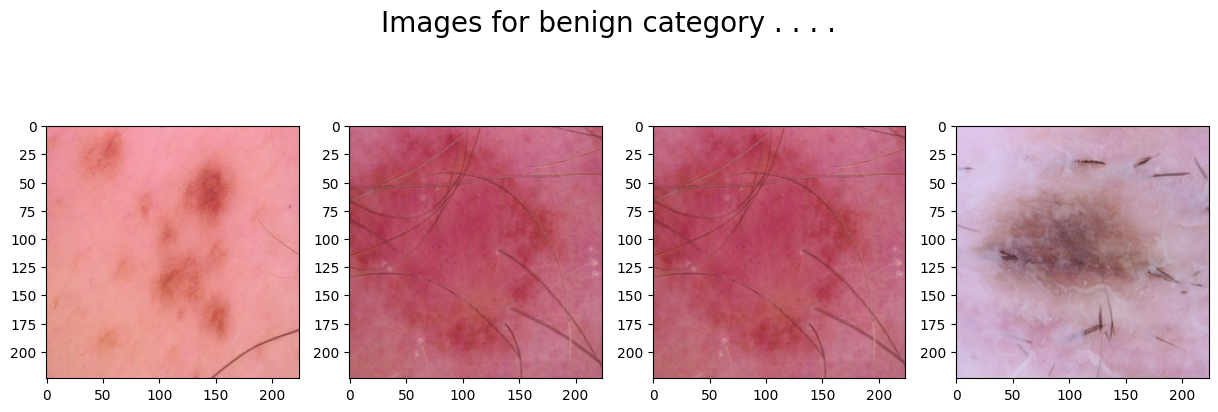

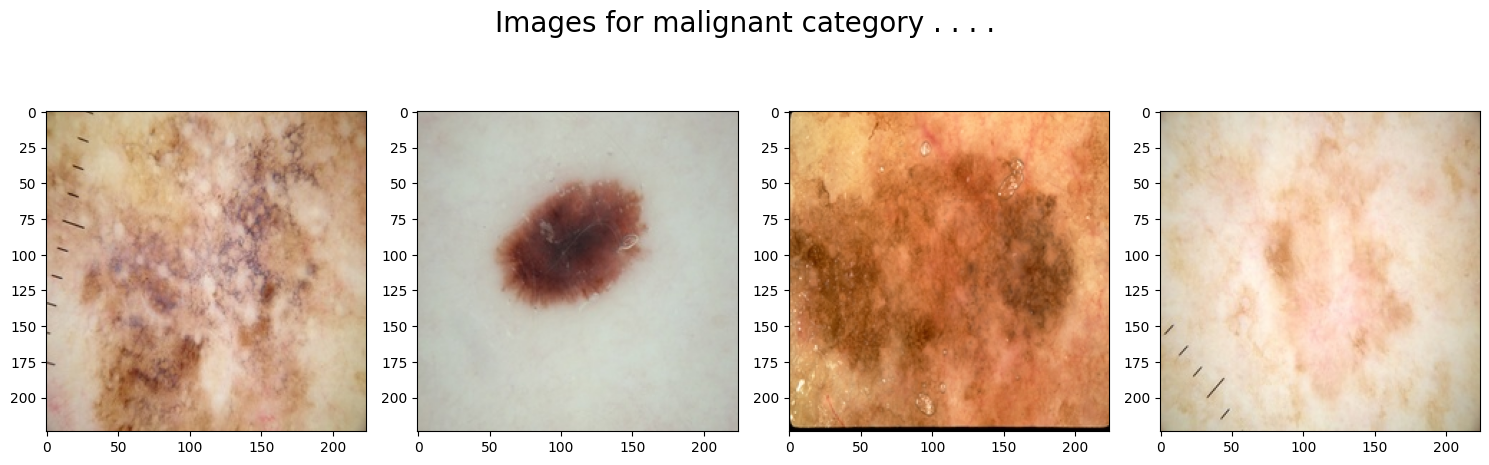

In [31]:
for cat in df['label'].unique():
	temp = df[df['label'] == cat]

	index_list = temp.index
	fig, ax = plt.subplots(1, 4, figsize=(15, 5))
	fig.suptitle(f'Images for {cat} category . . . .', fontsize=20)
	for i in range(4):
		index = np.random.randint(0, len(index_list))
		index = index_list[index]
		data = df.iloc[index]

		image_path = data[0]

		img = np.array(Image.open(image_path))
		ax[i].imshow(img)
plt.tight_layout()
plt.show()


In [32]:
features = df['filepath']
target = df['label_bin']

X_train, X_val,\
	Y_train, Y_val = train_test_split(features, target,
									test_size=0.15,
									random_state=10)

X_train.shape, X_val.shape


((229,), (41,))

In [33]:
def decode_image(filepath, label=None):

	img = tf.io.read_file(filepath)
	img = tf.image.decode_jpeg(img)
	img = tf.image.resize(img, [224, 224])
	img = tf.cast(img, tf.float32) / 255.0

	if label == 'benign':
		Label = 0
	else:
		Label = 1

	return img, Label


In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# Assuming 'benign' and 'malignant' are your classes
label_encoder = {'benign': 0, 'malignant': 1}
Y_train_encoded = [label_encoder[label] for label in Y_train]
Y_val_encoded = [label_encoder[label] for label in Y_val]

# Convert to one-hot encoded vectors
num_classes = 2  # Adjust based on the number of classes
Y_train_one_hot = to_categorical(Y_train_encoded, num_classes)
Y_val_one_hot = to_categorical(Y_val_encoded, num_classes) 

def encode_label(label):
    if label == 'benign':
        return 0
    elif label == 'malignant':
        return 1
    # Add more label mappings as needed
    else:
        raise ValueError("Unknown label:", label)

# Convert string labels to numerical labels
label_encoder = {'benign': 0, 'malignant': 1}
Y_train_encoded = [label_encoder[label] for label in Y_train]
Y_val_encoded = [label_encoder[label] for label in Y_val]

train_ds = (
    tf.data.Dataset
        .from_tensor_slices((X_train, Y_train_encoded))
        .map(decode_image, num_parallel_calls=AUTO)
        .batch(32)
        .prefetch(AUTO)
)

val_ds = (
    tf.data.Dataset
        .from_tensor_slices((X_val, Y_val_encoded))
        .map(decode_image, num_parallel_calls=AUTO)
        .batch(32)
        .prefetch(AUTO)
)


In [46]:
import numpy as np

# Assuming Y_train is a list of strings
Y_train = ['benign', 'malignant', 'benign', 'other_label']  # Example data
Y_val = ['malignant', 'benign']

# Create a label encoder with a default value for unknown labels
label_encoder = {'benign': 0, 'malignant': 1, 'unknown': -1}

# Handle unknown labels
Y_train_encoded = [label_encoder.get(label, label_encoder['unknown']) for label in Y_train]
Y_val_encoded = [label_encoder.get(label, label_encoder['unknown']) for label in Y_val]

print(Y_train_encoded)  # Output: [0, 1, 0, -1]
print(Y_val_encoded)    # Output: [1, 0]

[0, 1, 0, -1]
[1, 0]


In [45]:
unique_labels = set(Y_train)
print(unique_labels)

{0, 1}


In [ ]:
train_ds = (
	tf.data.Dataset
	.from_tensor_slices((X_train, Y_train))
	.map(decode_image, num_parallel_calls=AUTO)
	.batch(32)
	.prefetch(AUTO)
)

val_ds = (
	tf.data.Dataset
	.from_tensor_slices((X_val, Y_val))
	.map(decode_image, num_parallel_calls=AUTO)
	.batch(32)
	.prefetch(AUTO)
)


In [37]:
from tensorflow.keras.applications.efficientnet import EfficientNetB7

pre_trained_model = EfficientNetB7(
	input_shape=(224, 224, 3),
	weights='imagenet',
	include_top=False
)

for layer in pre_trained_model.layers:
	layer.trainable = False


258076736/258076736 ━━━━━━━━━━━━━━━━━━━━ 194s 1us/step


In [38]:
from tensorflow.keras import Model

inputs = layers.Input(shape=(224, 224, 3))
x = layers.Flatten()(inputs)

x = layers.Dense(256, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.BatchNormalization()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model = Model(inputs, outputs)


In [39]:
model.compile(
	loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
	optimizer='adam',
	metrics=['AUC']
)


In [ ]:
history = model.fit(train_ds,
					validation_data=val_ds,
					epochs=5,
					verbose=1)


In [ ]:
hist_df = pd.DataFrame(history.history)
hist_df.head()


In [ ]:
hist_df['loss'].plot()
hist_df['val_loss'].plot()
plt.title('Loss v/s Validation Loss')
plt.legend()
plt.show()


In [ ]:
hist_df['auc'].plot()
hist_df['val_auc'].plot()
plt.title('AUC v/s Validation AUC')
plt.legend()
plt.show()
